# Speed Date Analysis

## Project 🚧
The marketing team needs help on a new project. They are experiencing a decrease in the number of matches, and they are trying to find a way to understand what makes people interested into each other.

They decided to run a speed dating experiment with people who had to give Tinder lots of informations about themselves that could ultimately reflect on ther dating profile on the app.

Tinder then gathered the data from this experiment. Each row in the dataset represents one speed date between two people, and indicates wether each of them secretly agreed to go on a second date with the other person.

## Goals 🎯
Use the dataset to understand what makes people interested into each other to go on a second date together:

- You may use descriptive statistics
- You may use visualisations

## Scope of this project 🖼️
Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.

The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information. See the Speed Dating Data Key document below for details.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv("data/SpeedDatingData.csv", encoding = 'unicode_escape')

## Important datas
When we saw the data descrition, theses data seems to be important to analyse:

### The general data :
- iid
- pid : partner’s iid number
- gender: Female=0, Male=1
- match: 1=yes, 0=no
- dec_o: decision of partner the night of event
- attr_o: rating by partner the night of the event, for all 6 attributes
- samerace: participant and the partner were the same race. 1= yes, 0=no
- age: age
- age_o : age of partner
- field_cd: code of field of study
- career_c: career coded
- mn_sat: Median SAT score for the undergraduate institution where attended. Taken from Barron’s 25th Edition college profile book.  Proxy for intelligence.
- income: Median household income based on zipcode using the Census Bureau website
- goal: What is your primary goal in participating in this event?

### The attributes the participant thinks important
- imprace: How important is it to you (on a scale of 1-10) that a person you date be of the same racial/ethnic background?
- imprelig: How important is it to you (on a scale of 1-10) that a person you date be of the same religious background?

Rate the importance of the following attributes on a scale of 1-10 
- attr1_s:  Attractive
- sinc1_s: Sincere
- intel1_s: Intelligent
- fun1_s: Fun
- amb1_s: Ambitious
- shar1_s: Has shared interests/hobbies

Rate your own attributes:
- attr3_s:  Attractive
- sinc3_s: Sincere
- intel3_s: Intelligent
- fun3_s: Fun
- amb3_s: Ambitious

Rate the importance of attribute 


### Interrests:
- sports: Playing sports/ athletics
- tvsports: Watching sports
- excersice: Body building/exercising
- dining: Dining out
- museums: Museums/galleries
- art: Art
- hiking:  Hiking/camping
- gaming: Gaming
- clubbing: Dancing/clubbing
- reading: Reading
- tv: Watching TV
- theater: Theater
- movies: Movies
- concerts: Going to concerts
- music: Music
- shopping: Shopping
- yoga: Yoga/meditation

### Futur:
- you_call: How many have you contacted to set up a date?
- them_cal: How many have contacted you?
- date_3: Have you been on a date with any of your matches?	Yes=1	No=2


In [2]:
dataset = dataset[['iid', 'pid', 'wave', 'gender', 'match', 'dec_o', 'attr_o', 'samerace', 'age', 'age_o', 'field_cd', 'career_c', 'mn_sat', 'income', 'goal', 'attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s', 'attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'you_call', 'them_cal', 'date_3']]
dataset['gender'] = dataset['gender'].apply(lambda x: 'Female' if x == 0 else 'Male')

### Number matches per wave
We look at the number of matches per wave to see if any waves are skewed by the fact that people bring a book.

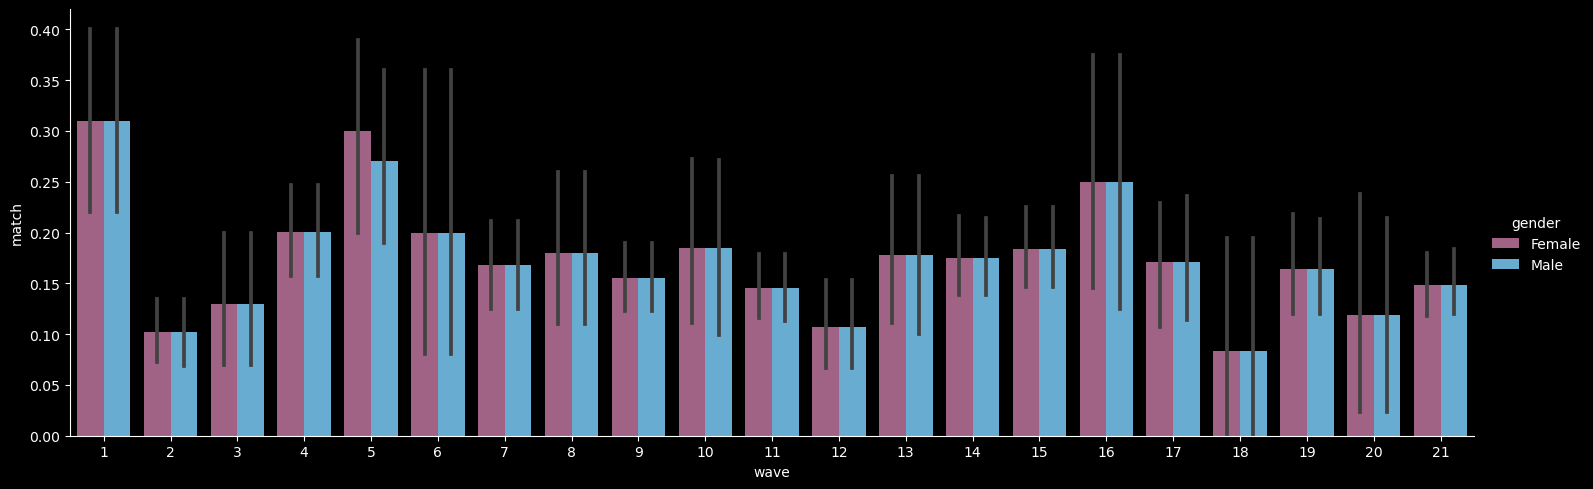

In [3]:
palette = {
    'Female': '#AA5986',
    'Male': '#56b3e3'
}
sns.catplot(x="wave", y="match", hue="gender", kind="bar", data=dataset, aspect=3, palette=palette)

We can see that, depending on the wave, the match rate is always between 10% and 30%. We can also see that there is no difference according to gender.

## Number matches in common
We're joining the dates with their partner.

[Text(0, 0, '3005'), Text(0, 0, '961'), Text(0, 0, '218')]

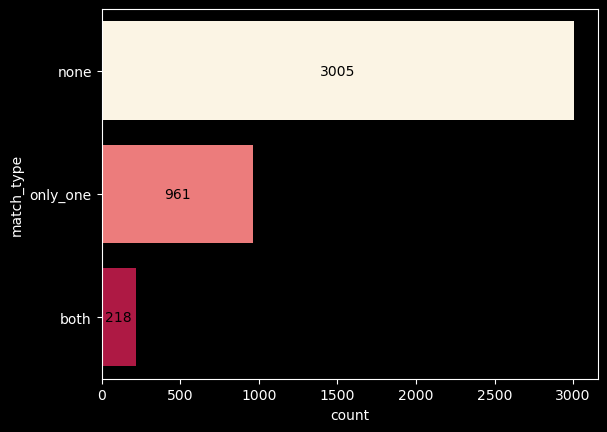

In [19]:
join_dataset = dataset.merge(dataset, left_on='pid', right_on='iid', how='left', suffixes=("", "_partner"))
join_dataset = join_dataset.drop_duplicates(subset=['iid', 'pid', 'iid_partner'])
join_dataset = join_dataset.dropna(subset=["pid"])
# join_dataset have duplicate date a.b & b.a
join_dataset["parter_combination"] = join_dataset.apply(lambda row: sorted((row['iid'], row['pid'])), axis=1)
join_dataset = join_dataset.drop_duplicates(subset=['parter_combination'])
# join_datset has no more duplicates

def match_type(match, partner_match):
    if (match == partner_match and match == 1):
        return "both"
    elif (match == partner_match and match == 0):
        return "none"
    else:
        return "only_one"

join_dataset["match_type"] = join_dataset.apply(lambda row: match_type(row['match'], row['match_partner']), axis=1)

ax = sns.countplot(data=join_dataset, y="match_type", order=['none', 'only_one', 'both'], palette=["#FFF5E0", "#FF6969", "#C70039"])
ax.bar_label(ax.containers[0], label_type="center", color="#000000")

There is three categories of dating result : 
- both matched
- only one matched
- or none matched

With these categories we have now a cluster sampling and study each group and see similaries or differences.
Just note that the "both" group is small compare to the "none" group so its analysis will be less certain. 

## Does age gap and ethnic are important

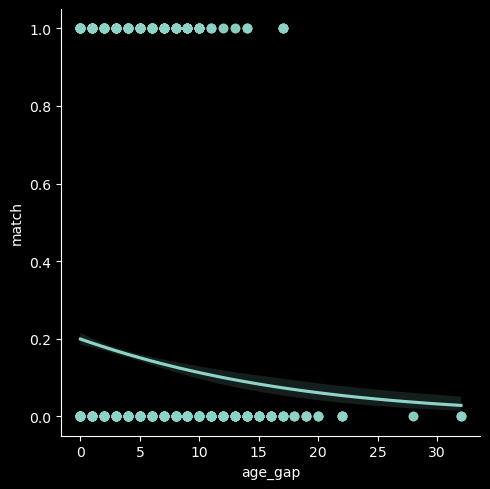

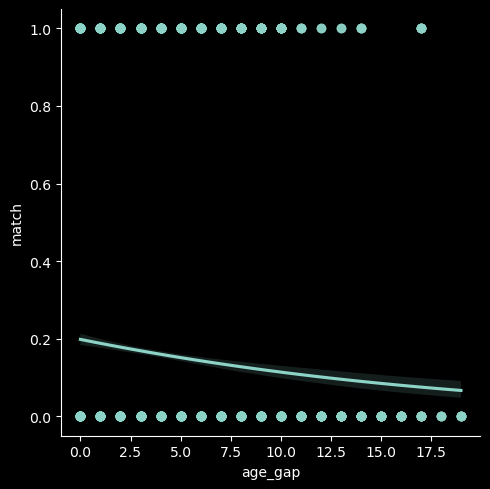

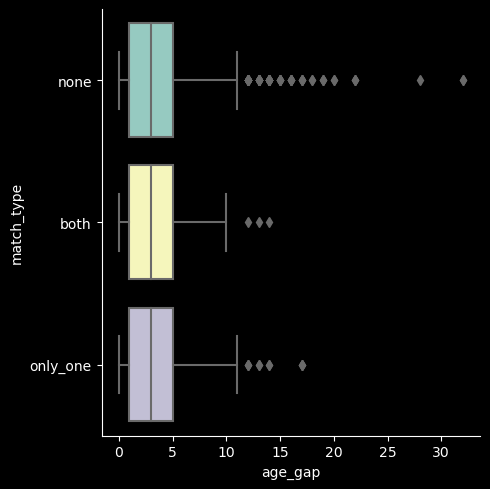

In [5]:
dataset[['age', 'age_o']] = dataset[['age', 'age_o']].fillna(dataset[['age', 'age_o']].median())
dataset["age_gap"] = (dataset['age'] - dataset['age_o']).abs()

join_dataset[['age', 'age_partner']] = join_dataset[['age', 'age_partner']].fillna(join_dataset[['age', 'age_partner']].median())
join_dataset["age_gap"] = (join_dataset['age'] - join_dataset['age_partner']).abs()

display(sns.lmplot(x="age_gap", y="match", data=dataset, logistic=True))
display(sns.lmplot(x="age_gap", y="match", data=dataset.loc[dataset["age_gap"] < 20, :], logistic=True))
display(sns.catplot(x='age_gap', y='match_type', data=join_dataset, kind='box'))

On remarque que si l'écart d'âge est très important (> 20 ans), la probabilité de matcher est quasi nulle. Si on se focus sur la plage < 20 ans, la probabilité baisse tut de même lorsque l'écart augmente.
Or si l'on compare l'écart d'age entre les différentes categories de match, on voie qu'il est similaire à toutes les categories. Donc il faut relativiser l'importance de l'age dans la probabilité de match et regarder si d'autres caractéristique ont plus d'impact comme l'ethnie ou les centres d'intérêts.

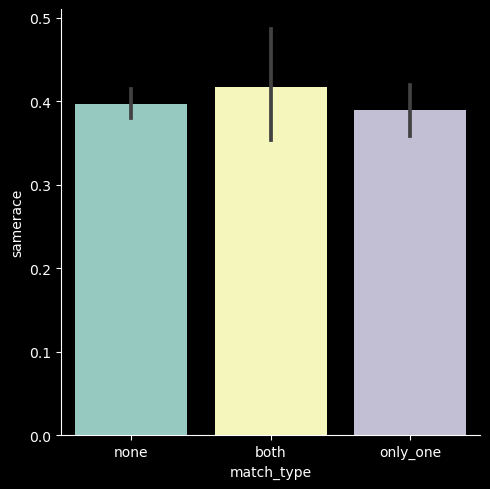

In [14]:
sns.catplot(x='match_type', y='samerace', data=join_dataset, kind="bar")

The same ethnie represents 40% of each sample so its not a revelant data

## Correlation of interest
Now check if the two partner have more chance to match if they shared some interest.


In [28]:
interest_partner1 = join_dataset[['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']].dropna()
interest_partner2 = join_dataset[['sports_partner', 'tvsports_partner', 'exercise_partner', 'dining_partner', 'museums_partner', 'art_partner', 'hiking_partner', 'gaming_partner', 'clubbing_partner', 'reading_partner', 'tv_partner', 'theater_partner', 'movies_partner', 'concerts_partner', 'music_partner', 'shopping_partner', 'yoga_partner']].dropna()
corr = interest_partner1.corrwith(interest_partner2)
display(interest_partner1.shape)
display(interest_partner1.describe(include="all"))
display(interest_partner2.shape)
display(interest_partner2.describe(include="all"))
display(corr)
#sns.heatmap(corr, annot=True)

(4125, 17)

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
count,4125.000000,4125.000000,4125.000000,4125.000000,4125.000000,4125.000000,4125.000000,4125.000000,4125.000000,4125.000000,4125.000000,4125.000000,4125.000000,4125.000000,4125.000000,4125.000000,4125.000000
mean,5.813333,4.162424,6.450909,8.147152,7.428364,7.219636,5.942061,3.302303,5.899879,7.907152,5.739394,7.481939,8.198061,7.103758,7.989576,6.499152,4.989818
std,2.653908,2.621498,2.441523,1.590289,1.903343,2.059906,2.555549,2.448996,2.438360,1.960290,2.488911,2.125540,1.555097,2.006512,1.669791,2.371491,2.686207
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,2.000000,5.000000,7.000000,6.000000,6.000000,4.000000,1.000000,4.000000,7.000000,4.000000,7.000000,7.000000,6.000000,7.000000,5.000000,3.000000
50%,6.000000,4.000000,7.000000,8.000000,8.000000,8.000000,6.000000,3.000000,6.000000,8.000000,6.000000,8.000000,8.000000,7.000000,8.000000,7.000000,5.000000
75%,8.000000,6.000000,8.000000,9.000000,9.000000,9.000000,8.000000,5.000000,8.000000,9.000000,8.000000,9.000000,9.000000,9.000000,9.000000,9.000000,7.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,14.000000,10.000000,13.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


(4164, 17)

,sports_partner,tvsports_partner,exercise_partner,dining_partner,museums_partner,art_partner,hiking_partner,gaming_partner,clubbing_partner,reading_partner,tv_partner,theater_partner,movies_partner,concerts_partner,music_partner,shopping_partner,yoga_partner
count,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000
mean,7.029779,4.982229,6.039625,7.423151,6.550672,6.217819,5.534822,4.453410,5.592219,7.455091,4.873439,6.080932,7.645773,6.548031,7.713497,4.771134,3.692363
std,2.438497,2.912557,2.380382,1.834781,2.099398,2.342694,2.569708,2.660372,2.556195,2.023202,2.495843,2.116004,1.791063,2.261299,1.895999,2.549293,2.591998
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,5.000000,2.000000,4.000000,6.000000,5.000000,4.000000,3.000000,2.000000,4.000000,6.000000,3.000000,5.000000,7.000000,5.000000,7.000000,2.000000,1.000000
50%,7.000000,5.000000,6.000000,8.000000,7.000000,7.000000,6.000000,4.000000,6.000000,8.000000,5.000000,6.000000,8.000000,7.000000,8.000000,5.000000,3.000000
75%,9.000000,7.000000,8.000000,9.000000,8.000000,8.000000,8.000000,6.000000,8.000000,9.000000,7.000000,8.000000,9.000000,8.000000,9.000000,7.000000,6.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,14.000000,10.000000,13.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


art                NaN
art_partner        NaN
clubbing           NaN
clubbing_partner   NaN
concerts           NaN
concerts_partner   NaN
dining             NaN
dining_partner     NaN
exercise           NaN
exercise_partner   NaN
gaming             NaN
gaming_partner     NaN
hiking             NaN
hiking_partner     NaN
movies             NaN
movies_partner     NaN
museums            NaN
museums_partner    NaN
music              NaN
music_partner      NaN
reading            NaN
reading_partner    NaN
shopping           NaN
shopping_partner   NaN
sports             NaN
sports_partner     NaN
theater            NaN
theater_partner    NaN
tv                 NaN
tv_partner         NaN
tvsports           NaN
tvsports_partner   NaN
yoga               NaN
yoga_partner       NaN
dtype: float64

Just correlation not causality